In [191]:
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
from matplotlib import font_manager, rc
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
x_data = pd.read_csv('pitcher_x_data_new.csv')
y_data = pd.read_csv('pitcher_y_data_new.csv')

In [192]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [193]:
x_data=x_data.reset_index(drop=True)
y_data=y_data.reset_index(drop=True)
#20이닝 이상
x_data=x_data[y_data['IP']>20]
y_data=y_data[y_data['IP']>20]

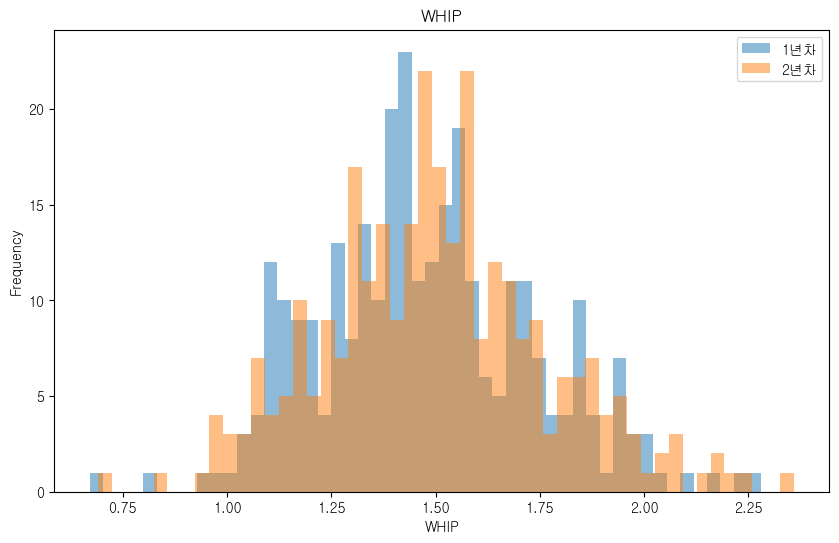

In [275]:
plt.figure(figsize=(10, 6))  
plt.hist(x_data['WHIP'], alpha=0.5, label='1년차', bins=50)  
plt.hist(y_data['WHIP'], alpha=0.5, label='2년차', bins=50)  
plt.xlabel('WHIP') 
plt.ylabel('Frequency') 
plt.title('WHIP')  
plt.legend()  
plt.show()

In [194]:
#류현진은 고졸 신인
x_data[x_data['Name']=='류현진']['Graduate']='고졸'
y_data[x_data['Name']=='류현진']['Graduate']='고졸'

In [195]:
for i in x_data.columns:
    try :
        x_data[i]=x_data[i].astype('float')
        y_data[i]=y_data[i].astype('float')
    except:
        continue

In [196]:
# 동명이인이 있을 경우, 이름 뒤에 팀 정보를 붙임
def add_team_to_duplicates(data):
    tally = {}
    result = []
    for i, row in data.iterrows():
        name = row['Name']
        team = row['Team']
        tally[name] = tally.get(name, 0) + 1
        
        if tally[name] > 1:
            name += f" ({team})"
        result.append(name)
    return result

x_data['Name'] = add_team_to_duplicates(x_data)
y_data['Name'] = add_team_to_duplicates(y_data)

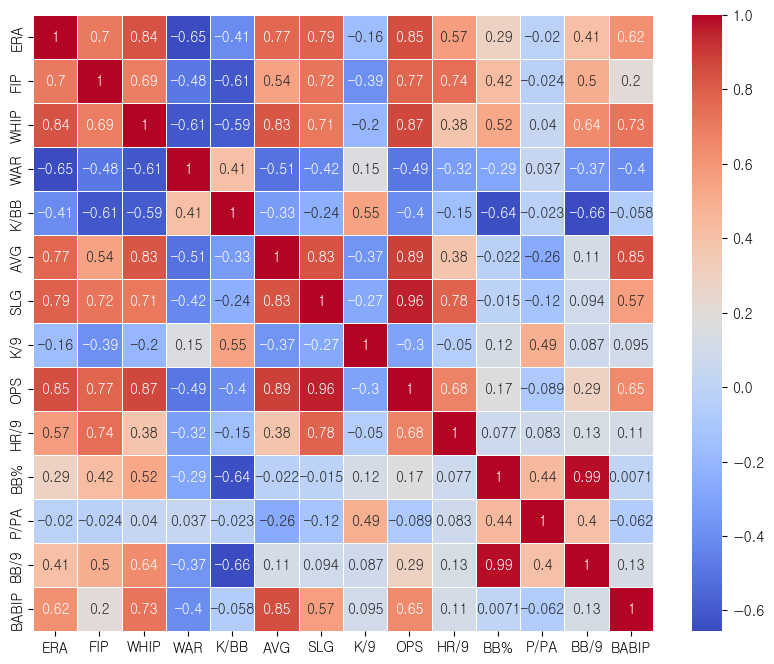

In [241]:
full = pd.concat([x_data,y_data])
full=full[['ERA', 'FIP', 'WHIP',
       'WAR', 'K/BB', 'AVG', 'SLG', 'K/9', 'OPS', 'HR/9', 'BB%', 'P/PA', 'BB/9', 'BABIP',]]
plt.figure(figsize=(10, 8))  
sns.heatmap(full.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show() 

In [200]:
# 두 데이터프레임을 'Name'을 기준으로 합치기
merged_data = pd.merge(x_data[['Year','Name','FIP', 'WHIP','ERA']], y_data[['Name','FIP', 'WHIP','ERA']], on='Name', suffixes=('_x', '_y'))
jinxed_players = merged_data[(merged_data['FIP_x'] < merged_data['FIP_y']) & (merged_data['WHIP_x'] < merged_data['WHIP_y'])]
print(jinxed_players)


       Year Name  FIP_x  WHIP_x  ERA_x  FIP_y  WHIP_y  ERA_y
0    2008.0  이범준   5.65    1.60   4.81   5.89    2.06   6.19
2    2006.0  우규민   3.39    1.08   1.55   4.02    1.14   2.65
7    2003.0  고우석   3.95    1.34   3.88   6.68    2.13   9.90
8    2015.0  박종훈   4.41    1.49   5.19   6.35    1.66   5.66
10   2013.0  임기영   4.38    1.79   4.50   7.03    2.07   6.75
..      ...  ...    ...     ...    ...    ...     ...    ...
274  2013.0  유희관   3.98    1.33   3.53   5.12    1.43   4.42
279  2017.0  김재영   5.09    1.41   4.54   6.06    1.55   5.66
285  2019.0  박진우   3.99    1.18   3.14   4.57    1.40   5.23
286  2005.0  임동규   3.83    1.19   2.74   4.82    1.28   3.91
290  1997.0  임선동   3.75    1.20   3.52   5.69    1.53   6.94

[103 rows x 8 columns]


In [201]:
merged_data['FIP_diff'] = merged_data['FIP_y'] - merged_data['FIP_x']
merged_data['WHIP_diff'] = merged_data['WHIP_y'] - merged_data['WHIP_x']
merged_data['ERA_diff'] = merged_data['ERA_y'] - merged_data['ERA_x']
merged_data['Total_diff'] = merged_data['FIP_diff'] + merged_data['WHIP_diff']
merged_data=merged_data[merged_data['Year']>2010]

# ERA순 정렬
jinxed_players_sorted = merged_data.sort_values(by='ERA_diff', ascending=False)

In [254]:
# 상위 30명과 하위 30명의 선수 명단 추출
top_30_names = jinxed_players_sorted.head(20)['Name']
bottom_30_names = jinxed_players_sorted.tail(20)['Name']

stats_list = ['Name', 'ERA', 'BB/9', 'SLG', 'FIP', 'WHIP', 'K/BB', 'HR/9']
top_30_x_fip = x_data[x_data['Name'].isin(top_30_names)][stats_list ]
top_30_y_fip = y_data[y_data['Name'].isin(top_30_names)][stats_list ]

bottom_30_x_fip = x_data[x_data['Name'].isin(bottom_30_names)][stats_list]
bottom_30_y_fip = y_data[y_data['Name'].isin(bottom_30_names)][stats_list]


In [255]:
#ERA순 정렬
top_30_x_fip.set_index('Name', inplace=True)
top_30_y_fip.set_index('Name', inplace=True)
bottom_30_x_fip.set_index('Name', inplace=True)
bottom_30_y_fip.set_index('Name', inplace=True)
top_30_diff = top_30_y_fip.subtract(top_30_x_fip, fill_value=0)
bottom_30_diff = bottom_30_y_fip.subtract(bottom_30_x_fip, fill_value=0)
top_30_diff = top_30_diff.sort_values(by='ERA', ascending=True)
bottom_30_diff = bottom_30_diff.sort_values(by='ERA', ascending=False)


In [259]:
bottom_30_diff.drop(['ERA'],axis=1,inplace=True)
top_30_diff.drop(['ERA'],axis=1,inplace=True)

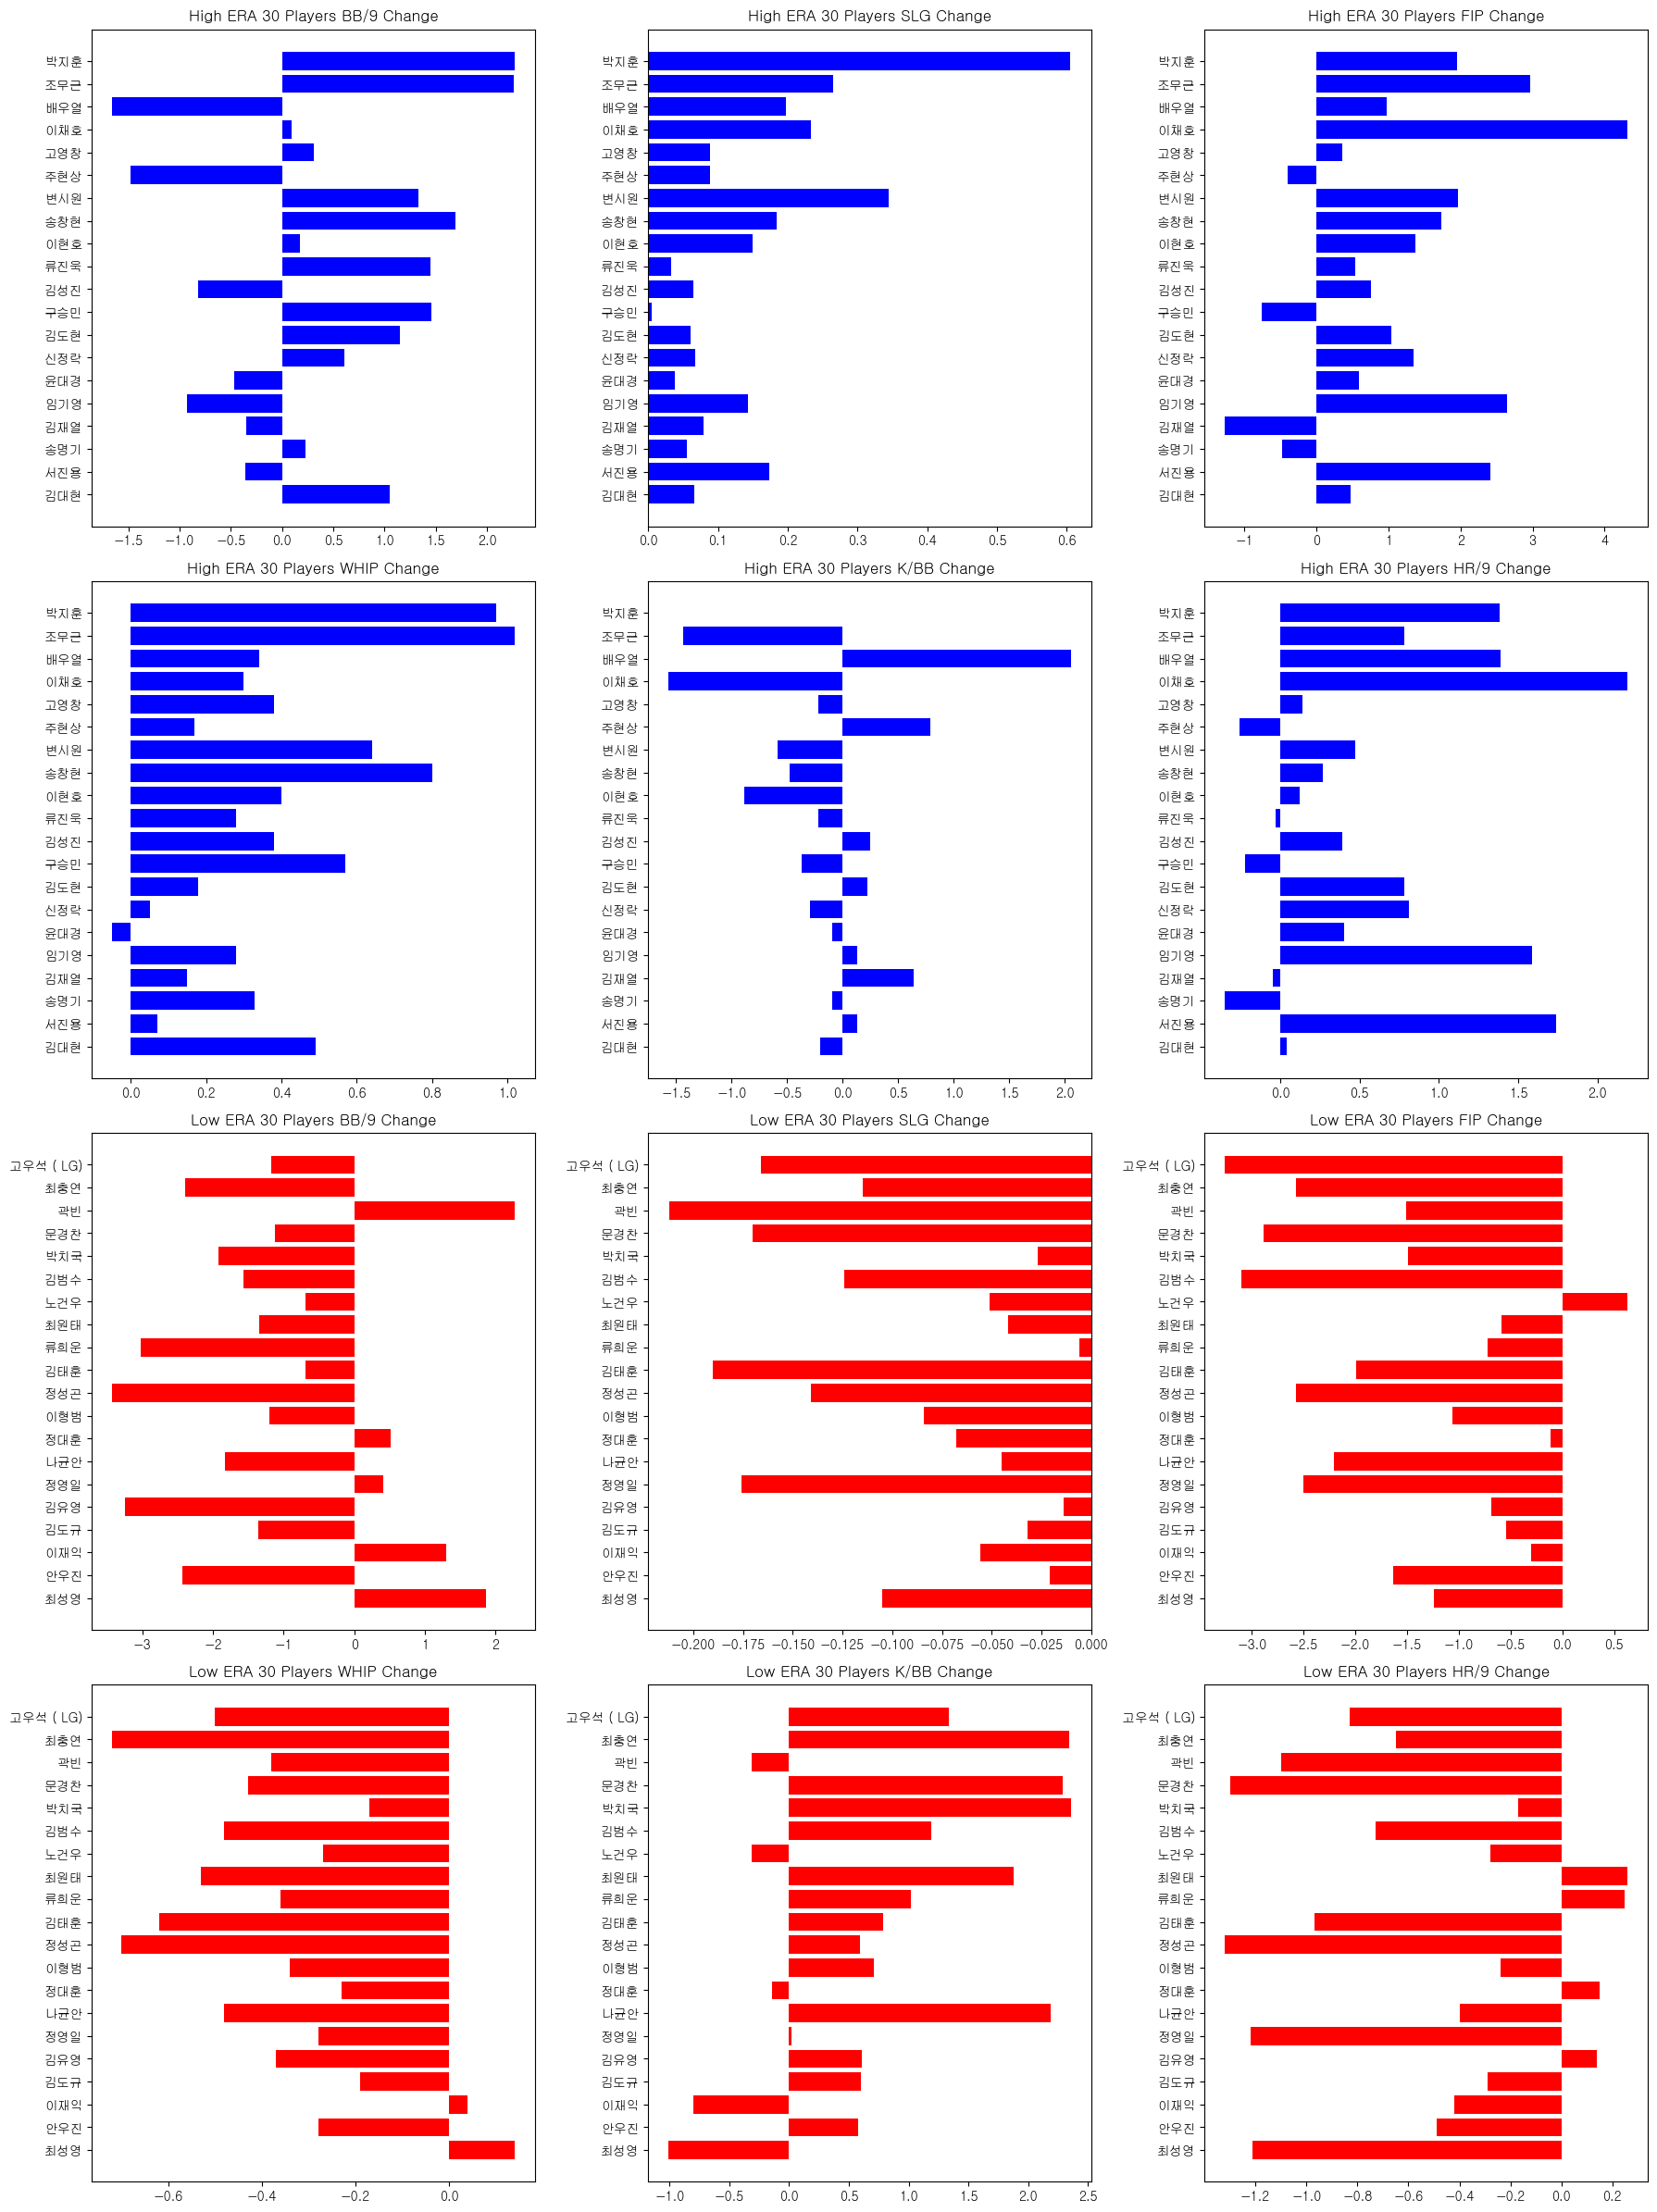

In [267]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))

for i, column in enumerate(top_30_diff.columns):
    ax = axes[i // 3, i % 3] 
    ax.barh(top_30_diff.index, top_30_diff[column], color='blue')
    ax.set_title(f'High ERA 30 Players {column} Change')

for i, column in enumerate(bottom_30_diff.columns):
    ax = axes[(i + 6) // 3, (i + 6) % 3] 
    ax.barh(bottom_30_diff.index, bottom_30_diff[column], color='red')
    ax.set_title(f'Low ERA 30 Players {column} Change')

plt.tight_layout()
plt.show()
